In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-prize-data/combined_data_3.txt
/kaggle/input/netflix-prize-data/movie_titles.csv
/kaggle/input/netflix-prize-data/combined_data_4.txt
/kaggle/input/netflix-prize-data/combined_data_1.txt
/kaggle/input/netflix-prize-data/README
/kaggle/input/netflix-prize-data/probe.txt
/kaggle/input/netflix-prize-data/combined_data_2.txt
/kaggle/input/netflix-prize-data/qualifying.txt
/kaggle/input/finalll-data/filtered_active_movies (1).csv


In [2]:
# Reading dataset file
dataset = pd.read_csv('/kaggle/input/finalll-data/filtered_active_movies (1).csv')


In [3]:
# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
dataset.head()

,MovieID,CustomerID,Rating,Title
0,8,785314,1.0,What the #$*! Do We Know!?
1,8,243963,3.0,What the #$*! Do We Know!?
2,8,1447783,4.0,What the #$*! Do We Know!?
3,8,1912665,1.0,What the #$*! Do We Know!?
4,8,1744889,1.0,What the #$*! Do We Know!?


In [4]:
#To print the datatype of columns
dataset.dtypes

MovieID         int64
CustomerID      int64
Rating        float64
Title          object
dtype: object

In [5]:
#To inspect the shape of the datset
dataset.shape

(55541107, 4)

In [6]:
#To print the head of dataset
dataset.head()

,MovieID,CustomerID,Rating,Title
0,8,785314,1.0,What the #$*! Do We Know!?
1,8,243963,3.0,What the #$*! Do We Know!?
2,8,1447783,4.0,What the #$*! Do We Know!?
3,8,1912665,1.0,What the #$*! Do We Know!?
4,8,1744889,1.0,What the #$*! Do We Know!?


In [7]:
#To find the distribution of different ratings in the datset
d = dataset.groupby('Rating')['Rating'].agg(['count'])
d =pd.DataFrame(d)
d

,count
Rating,
1.0,2159842
2.0,5639526
3.0,16990340
4.0,18983836
5.0,11767563


In [8]:
movie_count = dataset['Rating'].isnull().sum()
movie_count

0

In [9]:
# get customer count
cust_count = dataset['CustomerID'].nunique()-movie_count

cust_count

96260

## Observation

- The number of customers is 96260

In [10]:
# get rating count

rating_count = dataset['CustomerID'].count() - movie_count
rating_count

55541107

## Observation

- The total number of ratings is 55541107

## To plot the distribution of the ratings in as a bar plot

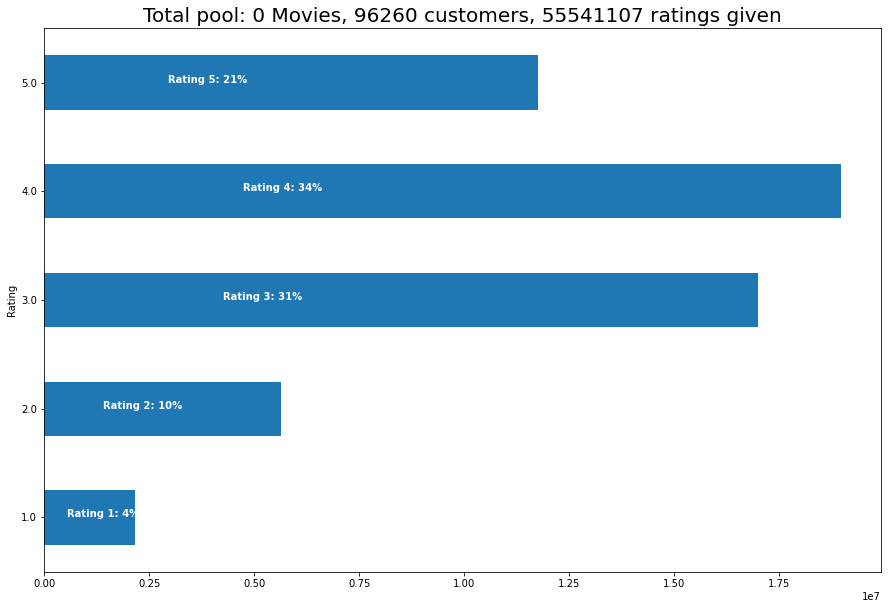

In [11]:
import matplotlib.pyplot as plt
ax = d.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('On')

for i in range(1,6):
    ax.text(d.iloc[i-1][0]/4, i-1,'Rating {}: {:.0f}%'.format(i, d.iloc[i-1][0]*100 / d.sum()[0]), color = 'white', weight = 'bold')

In [12]:
dataset.head()

,MovieID,CustomerID,Rating,Title
0,8,785314,1.0,What the #$*! Do We Know!?
1,8,243963,3.0,What the #$*! Do We Know!?
2,8,1447783,4.0,What the #$*! Do We Know!?
3,8,1912665,1.0,What the #$*! Do We Know!?
4,8,1744889,1.0,What the #$*! Do We Know!?


In [13]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating),)

df_nan.head()

,Rating
0,False
1,False
2,False
3,False
4,False


In [14]:
df = pd.isnull(dataset['Rating'])
df1 = pd.DataFrame(df)
df2 = df1[df1['Rating']==True]
df2

,Rating


## Now we know all that where does the movies counting start from

In [15]:
df2 = df2.reset_index()
df_nan = df2.copy()

In [16]:
df_nan

,index,Rating


In [17]:
import numpy as np

# Extract unique movie IDs from the 'MovieID' column
unique_movie_ids = dataset.index.unique()

# Get the total number of unique movies
num_movies = len(unique_movie_ids)

# Create a numpy array containing movie IDs
movie_np = np.arange(1, num_movies + 1)

# Print the movie numpy array and its length
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')


Movie numpy: [       1        2        3 ... 55541105 55541106 55541107]
Length: 55541107


In [18]:
# Remove rows with NaN values in the 'Rating' column
dataset = dataset[pd.notnull(dataset['Rating'])]

# Convert 'CustomerID' column to integers
dataset['CustomerID'] = dataset['CustomerID'].astype(int)

# Print some examples of the dataset
print('-Dataset examples-')
print(dataset.head())



-Dataset examples-
   MovieID  CustomerID  Rating                       Title
0        8      785314     1.0  What the #$*! Do We Know!?
1        8      243963     3.0  What the #$*! Do We Know!?
2        8     1447783     4.0  What the #$*! Do We Know!?
3        8     1912665     1.0  What the #$*! Do We Know!?
4        8     1744889     1.0  What the #$*! Do We Know!?


In [19]:
f = ['count','mean']

In [20]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('MovieID')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)



In [21]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 17221.0


FOR 0.7 QUANTILE- Movie minimum times of review: 17221.0


In [22]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.8),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 24868.0


FOR 0.7 QUANTILE- Movie minimum times of review: 24868.0



In [23]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('CustomerID')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 637.0


In [24]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('CustomerID')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.8),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 759.0


In [25]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (55541107, 4)


In [26]:
dataset = dataset[~dataset['MovieID'].isin(drop_movie_list)]
dataset = dataset[~dataset['CustomerID'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (8959277, 4)


In [27]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,MovieID,CustomerID,Rating,Title
22130,28,1990901,5.0,Lilo and Stitch
22133,28,765331,3.0,Lilo and Stitch
22134,28,1987434,4.0,Lilo and Stitch
22136,28,2193455,4.0,Lilo and Stitch
22137,28,1468812,4.0,Lilo and Stitch


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [28]:
df_p = pd.pivot_table(dataset,values='Rating',index='CustomerID',columns='MovieID')

print(df_p.shape)

(19292, 701)


In [29]:
df_title = pd.read_csv('/kaggle/input/netflix-prize-data/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# To install the scikit-surprise library for implementing SVD

In [30]:
# Import required libraries
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [31]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['CustomerID', 'MovieID', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9486  0.9505  0.9480  0.9490  0.0011  
MAE (testset)     0.7498  0.7539  0.7539  0.7525  0.0019  
Fit time          6.64    6.68    6.65    6.65    0.02    
Test time         0.45    0.44    0.45    0.45    0.00    


{'test_rmse': array([0.94856037, 0.95050824, 0.94804655]),
 'test_mae': array([0.74979416, 0.75387636, 0.75391558]),
 'fit_time': (6.638631582260132, 6.6750404834747314, 6.647518634796143),
 'test_time': (0.45343685150146484, 0.44234323501586914, 0.4458293914794922)}

In [32]:
dataset.head()

,MovieID,CustomerID,Rating,Title
22130,28,1990901,5.0,Lilo and Stitch
22133,28,765331,3.0,Lilo and Stitch
22134,28,1987434,4.0,Lilo and Stitch
22136,28,2193455,4.0,Lilo and Stitch
22137,28,1468812,4.0,Lilo and Stitch


In [33]:
dataset_712664 = dataset[(dataset['CustomerID'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('MovieID')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

MovieID
175            Reservoir Dogs
199           The Deer Hunter
241        North by Northwest
357     House of Sand and Fog
457         Kill Bill: Vol. 2
571           American Beauty
708         The Perfect Storm
788                    Clerks
798                      Jaws
1102             Training Day
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [34]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


In [35]:
# getting full dataset
data = Dataset.load_from_df(dataset[['CustomerID', 'MovieID', 'Rating']], reader)

In [36]:
#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

In [37]:
# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

         Year                               Name  Estimate_Score
16264  1977.0  Star Wars: Episode IV: A New Hope             5.0
12292  1972.0                      The Godfather             5.0
6116   1970.0                             Patton             5.0
17338  1987.0                  Full Metal Jacket             5.0
16603  1992.0                         Unforgiven             5.0
11063  1994.0                       Pulp Fiction             5.0
5731   1990.0        GoodFellas: Special Edition             5.0
174    1992.0                     Reservoir Dogs             5.0
5560   1967.0                     Cool Hand Luke             5.0
6098   1979.0                     Apocalypse Now             5.0
